In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

wirkingDir = './'

In [2]:
def matrixFromFile(fileName): # matrix creation from a generic file
    with open(workingDir + fileName,'r') as file:
        content = file.readlines()
    
    params = content[0].split()
    rows = int(params[0])
    cols = int(params[1])
    n = int(params[2])

    A = np.zeros((rows,cols))

    content.pop(0)
    for elemento in content:
        params = elemento.split()
        i = int(params[0])
        j = int(params[1])
        val = float(params[2])

        A[i,j] = val

    return A

def vectorFromFile(fileName):  #  vector creation from file
    with open(wirkingDir + fileName,'r') as file:
        content = file.readlines()
    n = int(content[0])
    f = []
    for i in range(n):
        f.append(float(content[i+1]))
    return np.array(f) 


def formatSol(n,u):  # from vector, create matrix
    out = []
    temp = []

    for i in range(n):
        for j in range(n):
            temp.append(u[i*n+j])
        out.append(temp)
        temp = []

    return np.matrix(out)

In [3]:
finestGridN = 25   # N, discretization ?
levels = 5 # deepness levels
alpha = 1. # a
width = 10. # of square matrix
testCase = 3 #1,2 or 3

In [4]:
N = finestGridN
for i in range(1,levels):
    N = N * 2 - 1
print(N)

385


In [5]:
!./../Multigrid -n {N} -a {alpha} -w {width} -ml {levels} -test {testCase}
#N = finestGridN

/bin/bash: line 1: ./../Multigrid: No such file or directory


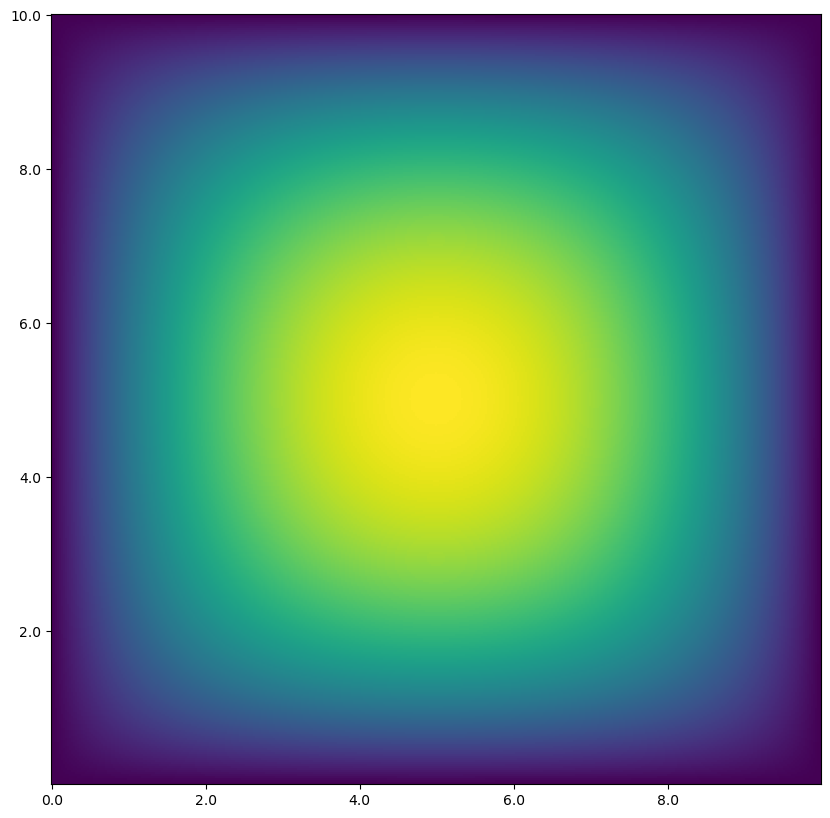

In [6]:
plt.rcParams['figure.figsize'] = [10,10]
colorMap = 'viridis'
u = vectorFromFile('x.mtx')
sol = formatSol(N,u)
plt.imshow(sol,cmap=colorMap)
plt.yticks(np.arange(0,N,N/5),np.around(width - np.arange(0,N,N/5)*width/N, decimals=2))
plt.xticks(np.arange(0,N,N/5),np.around(np.arange(0,N,N/5)*width/N, decimals=2))
plt.show()

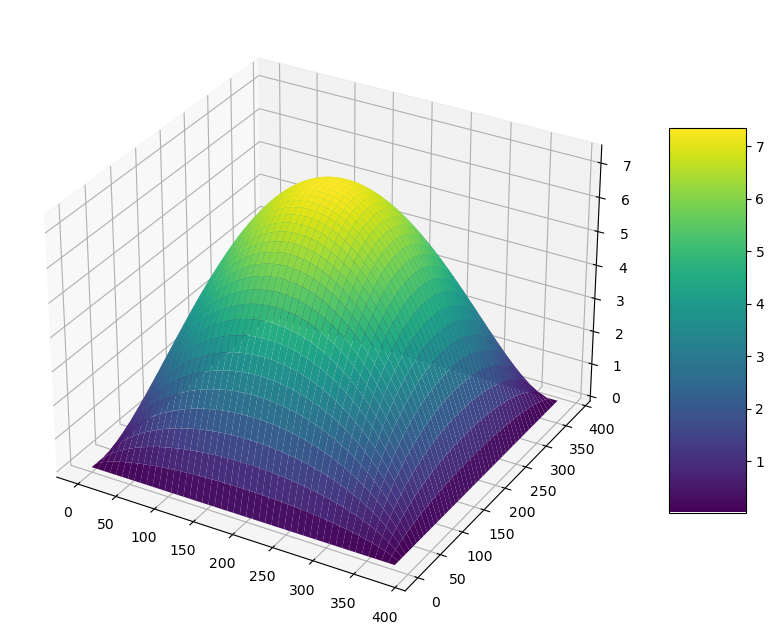

In [7]:
X = np.arange(0,N)
Y = np.arange(0,N)

X,Y = np.meshgrid(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,sol,cmap = colorMap)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


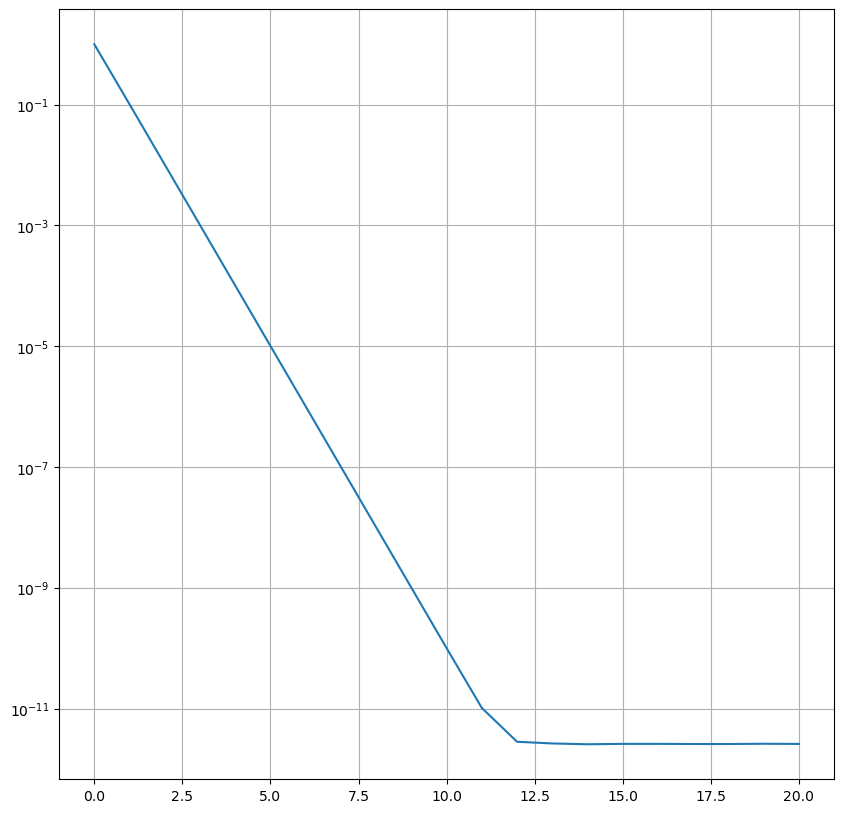

In [8]:

solvers = ['MGGS4.txt']
for solver in solvers:
    error = vectorFromFile(solver)
    x = np.arange(0,len(error))
    plt.semilogy(x,error)
plt.grid()
plt.show()